In [47]:
%config InlineBackend.figure_format = 'retina'

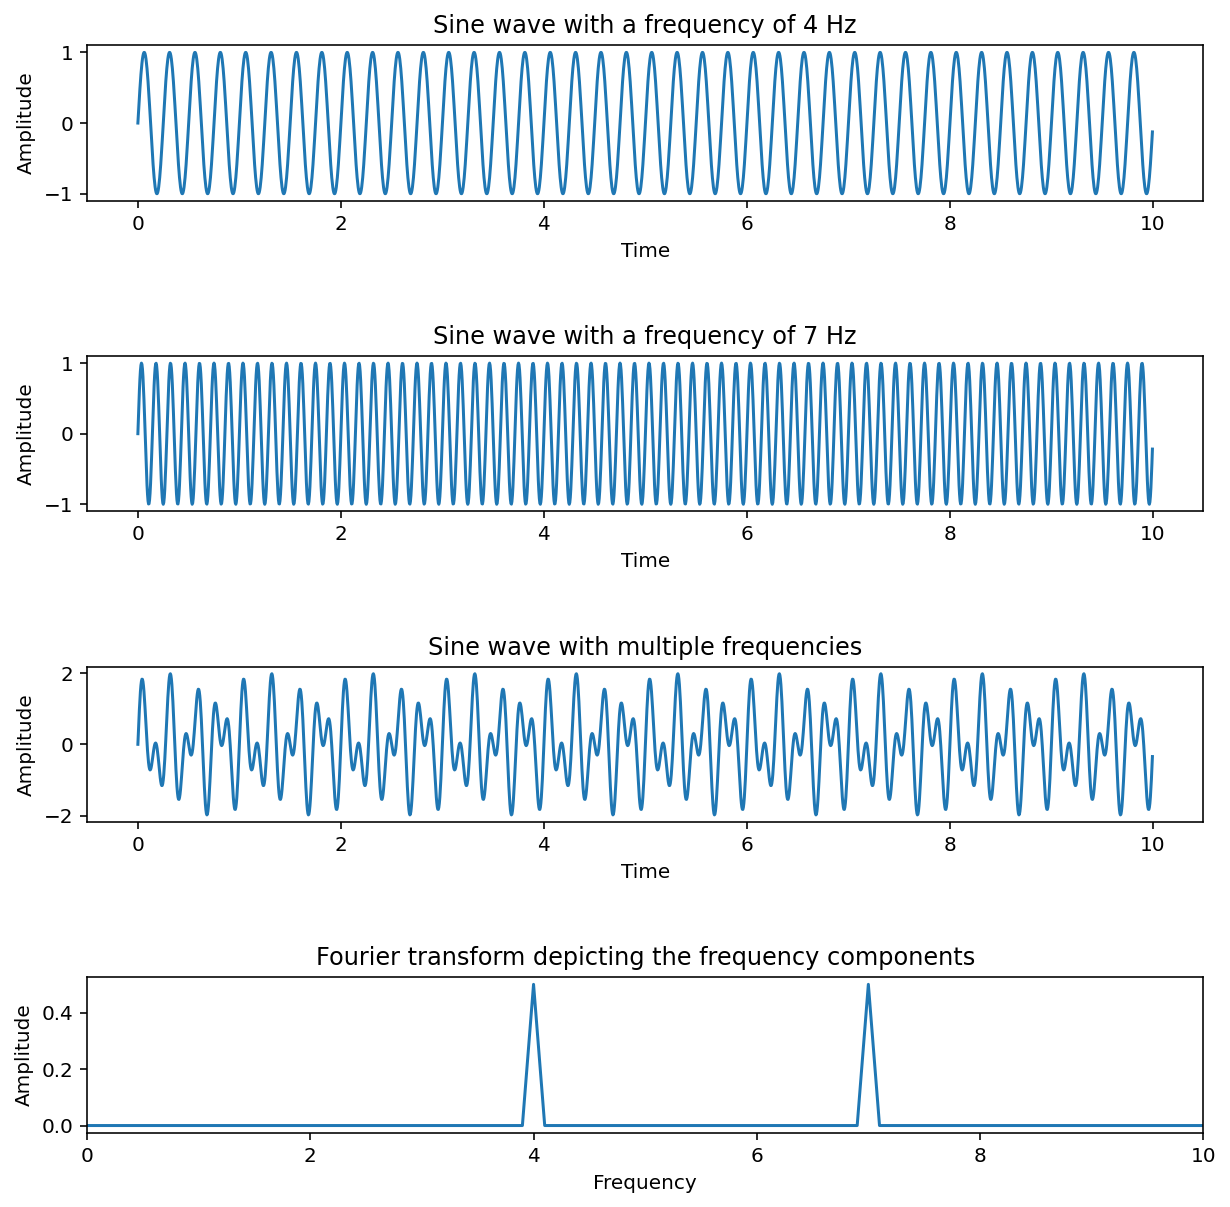

In [130]:
# From https://pythontic.com/visualization/signals/fouriertransform_fft

# Python example - Fourier transform using numpy.fft method

import numpy as np
import matplotlib.pyplot as plt


# How many time points are needed i,e., Sampling Frequency
samplingFrequency   = 200;

# At what intervals time points are sampled
samplingInterval       = 1 / samplingFrequency;

# Begin time period of the signals
beginTime           = 0;

# End time period of the signals
endTime             = 10; 

# Frequency of the signals
signal1Frequency     = 4;
signal2Frequency     = 7;

# Time points
time        = np.arange(beginTime, endTime, samplingInterval);

# Create two sine waves
amplitude1 = np.sin(2*np.pi*signal1Frequency*time)
amplitude2 = np.sin(2*np.pi*signal2Frequency*time)

# Create subplot
figure, axis = plt.subplots(4, 1,figsize=(10,10))
plt.subplots_adjust(hspace=1)

# Time domain representation for sine wave 1

axis[0].set_title('Sine wave with a frequency of 4 Hz')
axis[0].plot(time, amplitude1)
axis[0].set_xlabel('Time')
axis[0].set_ylabel('Amplitude')


# Time domain representation for sine wave 2
axis[1].set_title('Sine wave with a frequency of 7 Hz')
axis[1].plot(time, amplitude2)
axis[1].set_xlabel('Time')
axis[1].set_ylabel('Amplitude')


# Add the sine waves
amplitude = amplitude1 + amplitude2
 
# Time domain representation of the resultant sine wave
axis[2].set_title('Sine wave with multiple frequencies')
axis[2].plot(time, amplitude)
axis[2].set_xlabel('Time')
axis[2].set_ylabel('Amplitude')
 
# Frequency domain representation
fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency
 
tpCount     = len(amplitude)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod

# Frequency domain representation
axis[3].set_title('Fourier transform depicting the frequency components')
axis[3].plot(frequencies, abs(fourierTransform))
axis[3].set_xlabel('Frequency')
axis[3].set_ylabel('Amplitude')
axis[3].set_xlim(0,10)




plt.show()

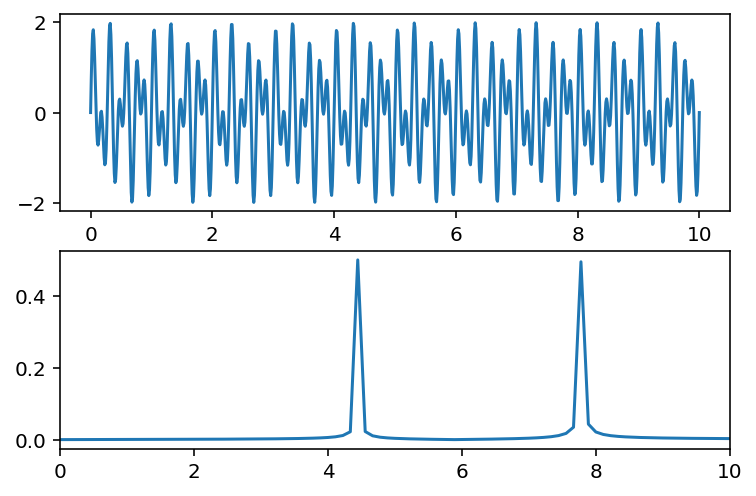

In [52]:
# Define a time range:
samplefrequency = 100 # Samples per second
sampleinterval = 1/samplefrequency # time interval between samples
start = 0
end = 10
time = np.arange(start,end,sampleinterval)
samplecount=900
time = np.linspace(start,end,samplecount)

# For some reason this FFT is dependent on the the sample count. Don't know why.

# Signal frequencies
f1 = 4
f2 = 7

# Defining waves
wave1 = np.sin(2*np.pi*f1*time)
wave2 = np.sin(2*np.pi*f2*time)

tot = wave1+wave2

# Set up the Fourier transform
tot_ft = np.fft.fft(tot)/len(tot) # Normalises the fourier transform)
tot_ft = tot_ft[range(int(len(tot)/2))] # excludes sampling frequency
 
tpCount = len(tot) # Number of data points
values = np.arange(int(tpCount/2)) #What? List of integers up to half the number of data points
timeperiod = tpCount/samplefrequency
frequencies = values/timeperiod

# Build the figures

figure, axis = plt.subplots(2,1)

# First plot
axis[0].plot(time,tot)

# Second plot
axis[1].plot(frequencies,abs(tot_ft))
axis[1].set_xlim(0,10)

plt.show()

In [22]:
test = np.arange(0,4.1,0.1)

In [13]:
test

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9])

In [23]:
len(test)

41

In [24]:
(int(len(test)/2))

20

In [26]:
np.arange(len(test)/2)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

# Trying a fourier transform again.

## Building test functions

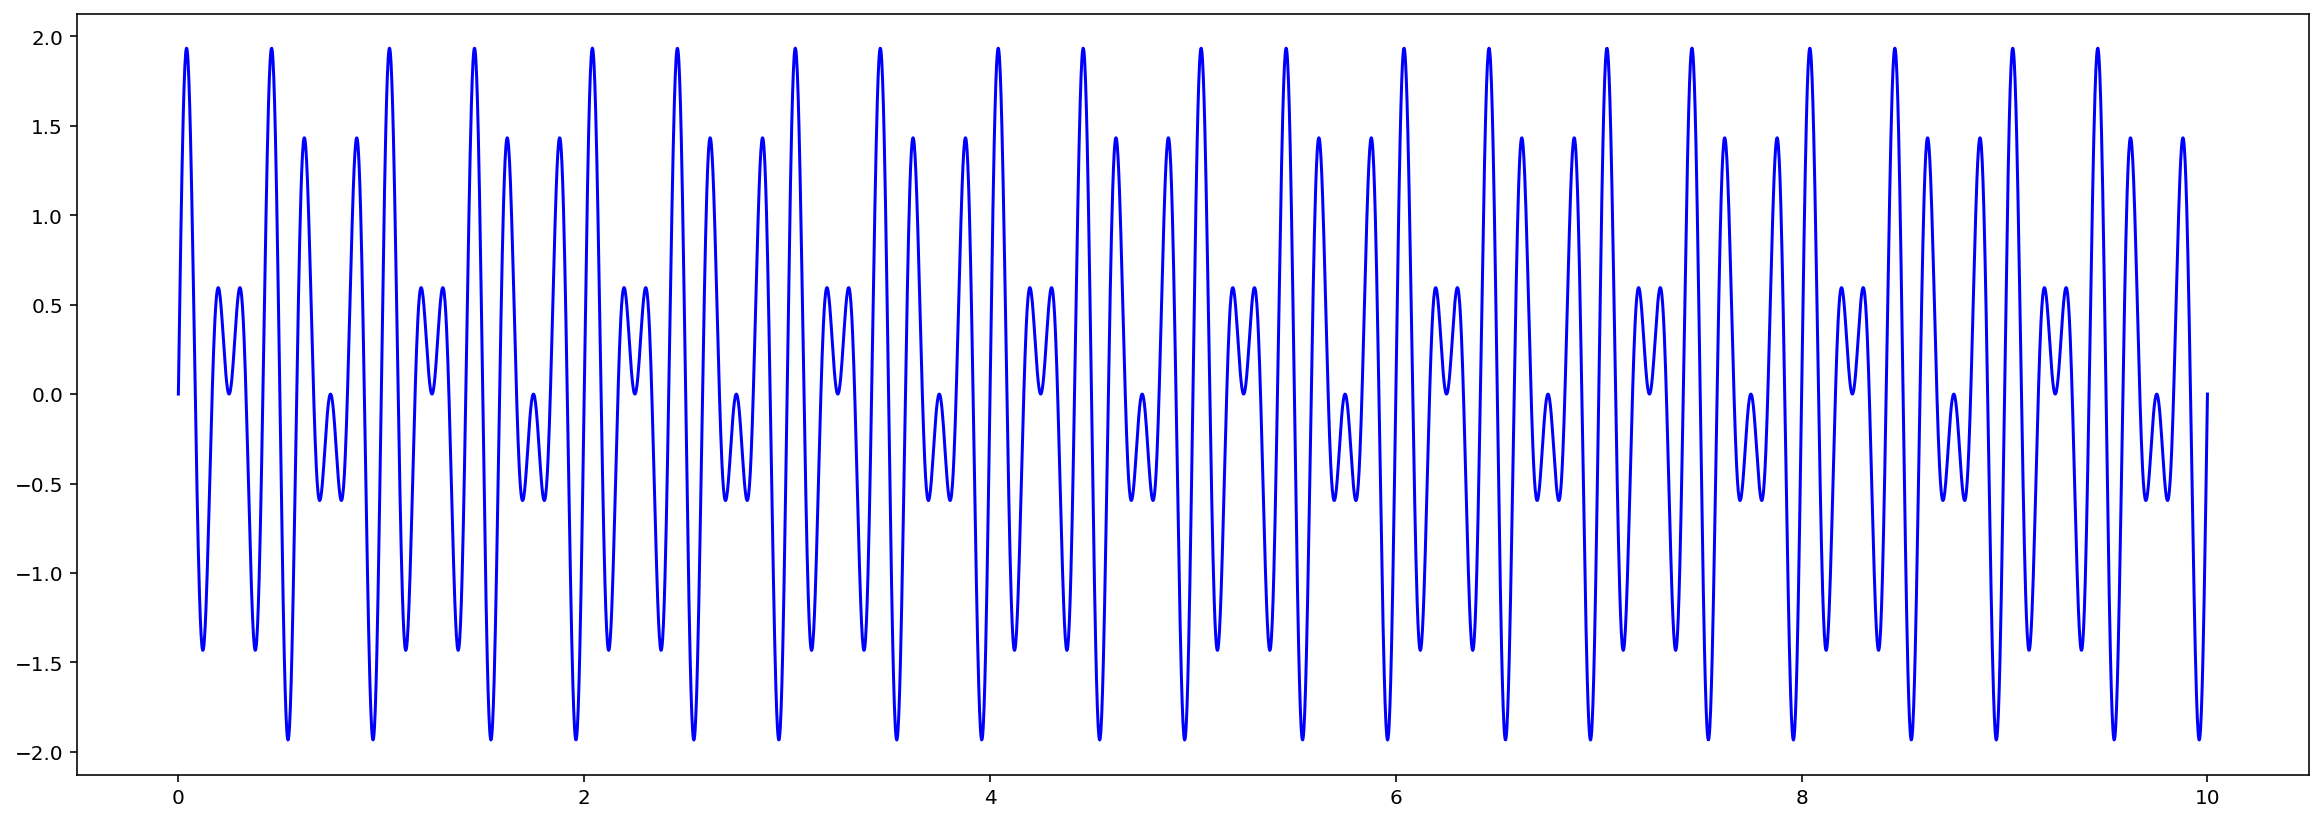

In [127]:
# Define a time series
start_time = 0
end_time = 10
measurements=300
sampling_freq = 500  # Hz

#step_size =end_time/measurements
#sampling_freq = 1/step_size

#times = np.arange(start_time,end_time,step_size)
# Change to use linspace
times = np.linspace(start_time,end_time,end_time*sampling_freq)

# Wave frenquencies
freq_1 = 5
freq_2 = 7

# Defining the waves and the convolution
wave_1 = np.sin(2*np.pi*freq_1*times)
wave_2 = np.sin(2*np.pi*freq_2*times)

wave_tot = wave_1+wave_2

plt.figure(figsize=(20,7))
plt.plot(times,wave_tot,color='b')
plt.show()

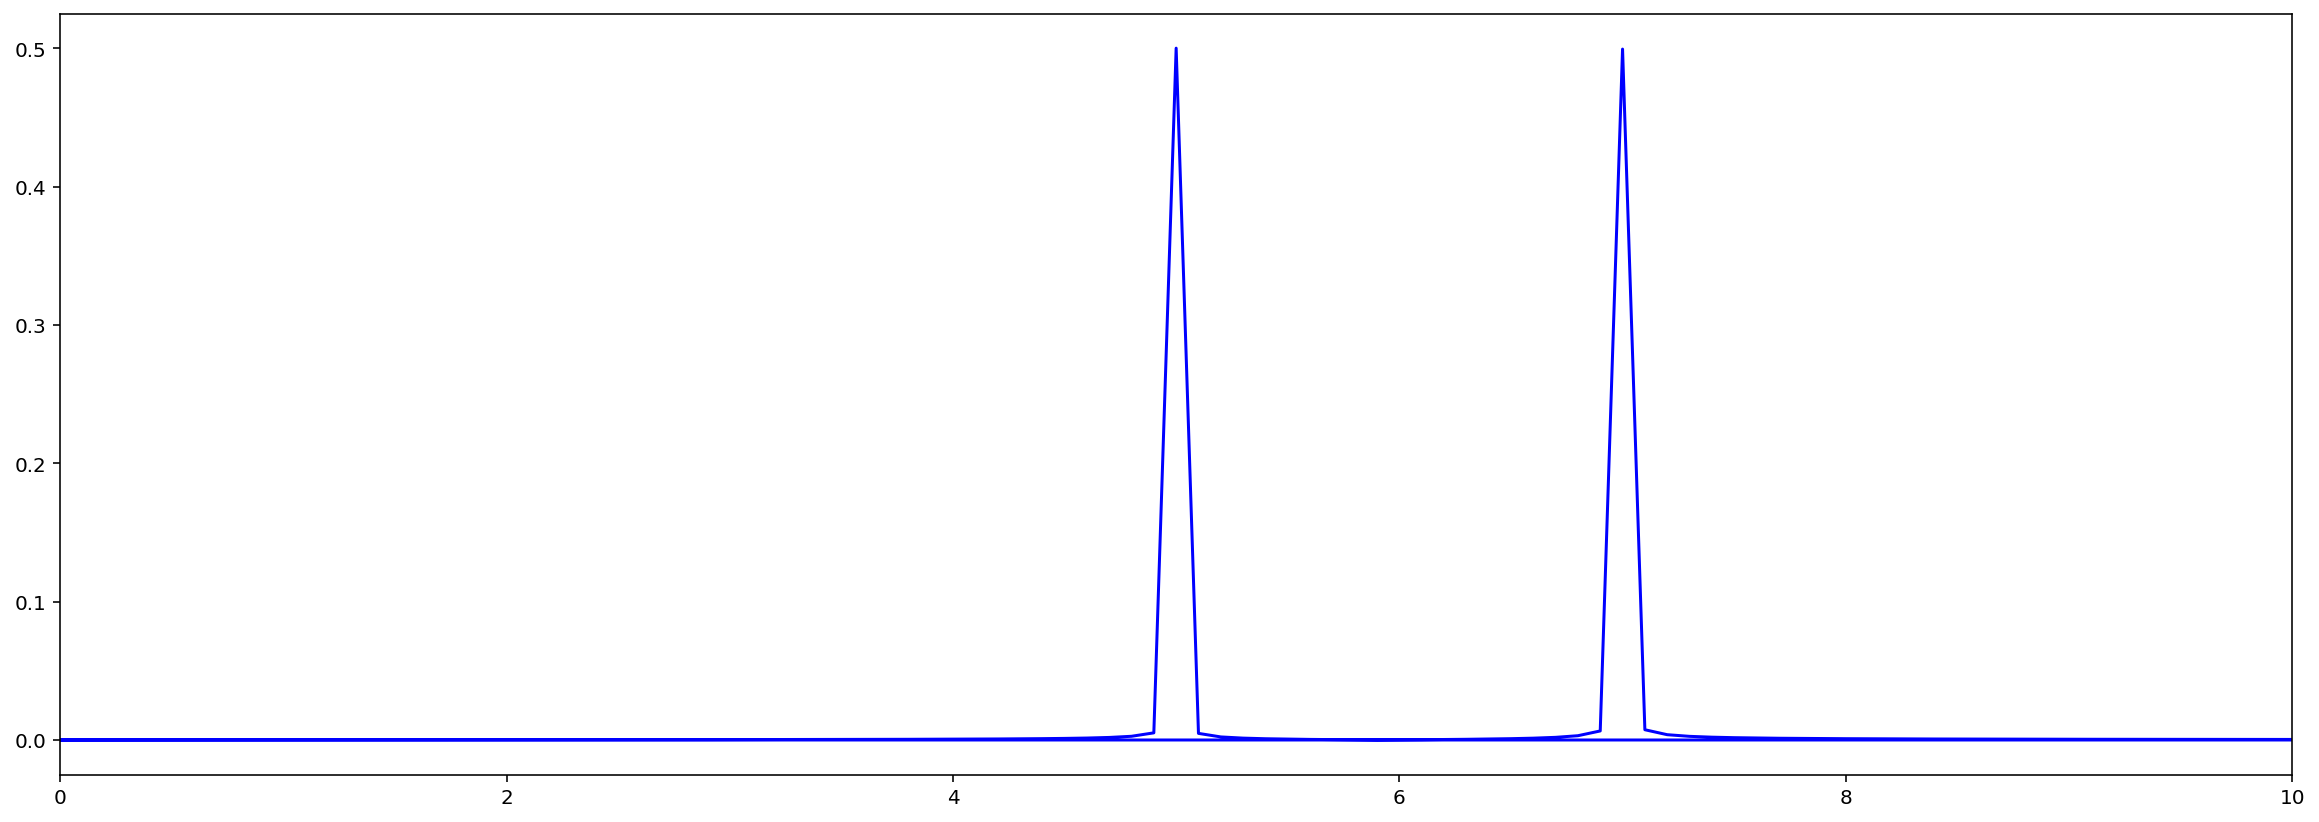

In [129]:
fourier1 = np.fft.fft(wave_tot)/len(wave_tot)
fourier_freqs = np.fft.fftfreq(len(wave_tot))*sampling_freq

plt.figure(figsize=(20,7))
plt.plot(fourier_freqs,abs(fourier1),color='b') # Plot abs values to eliminate negative y
plt.xlim((0,10)) # Function is symmetric
plt.show()

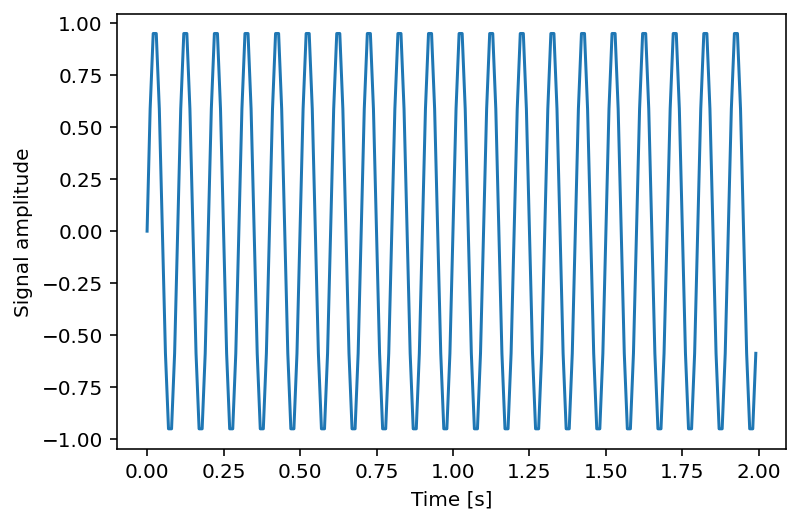

In [75]:
# From https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html
f = 10  # Frequency, in cycles per second, or Hertz
f_s = 100  # Sampling rate, or number of measurements per second

t = np.linspace(0, 2, 2 * f_s, endpoint=False)
x = np.sin(f * 2 * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');

<ipython-input-104-b3315dbe8d21>:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(freqs, np.abs(X))


(-5.0, 110.0)

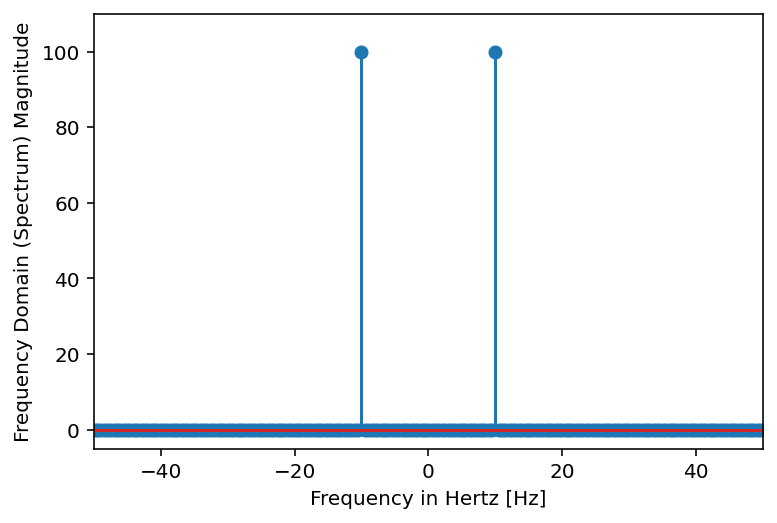

In [104]:
X = np.fft.fft(x) # Determines the fourier transform of x
freqs = np.fft.fftfreq(len(x)) * f_s 
# Finds the fourier frequencies of each list element, multiplied by actual sampling rate

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
ax.set_ylim(-5, 110)

In [86]:
true_range = np.linspace(0,10,10,endpoint = True)
false_range = np.linspace(0,10,10,endpoint = False)
nothing_range = np.linspace(0,10,10)

In [87]:
true_range

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])

In [89]:
false_range

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [90]:
nothing_range

array([ 0.        ,  1.11111111,  2.22222222,  3.33333333,  4.44444444,
        5.55555556,  6.66666667,  7.77777778,  8.88888889, 10.        ])